<a href="https://colab.research.google.com/github/muniappabalaji/TimeSeries/blob/main/Electric_Production_TimeSeries_October2025_GL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Approach to the Electric Production Dataset**
1. Load the dataset into Python
2. Audit the dataset (info, first few rows)
3. Plot the dataset
4. Change Date Variable into Index
5. Decompose the time series (Trend, Seasonal and Error/Residual)
6. Moving Average and Exponential Smoothing
   1. Simple Moving Average
   2. Exponential Smoothing
   3. Holts Model (Double Exponential Smoothing)
   4. Holt and Winters Model (Triple Exponential Smoothing)
7. Compare all the MA and ES models and append the results
8. Check for Auto-Correlation
9. Check for Stationarity
10. Application of ARIMA and SARIMA
11. Append the model results
12. Productionize the model for inference

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import sys
import warnings
import itertools
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.tsa.api as smf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

In [2]:
df = pd.read_csv('/content/Electric_Production.csv')

In [3]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
df.tail()

,DATE,IPG2211A2N
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


Rename the production column from IPG2211A2N to ElectricityProduction

In [7]:
df.rename(columns={'IPG2211A2N': 'ElectricityProduction'}, inplace=True)
display(df.head())

,DATE,ElectricityProduction
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [8]:
df['DATE'] = pd.to_datetime(df['DATE'])
#Set the date column as Index
df = df.set_index('DATE')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ElectricityProduction  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [11]:
df.head()

,ElectricityProduction
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


**Plot the dataset**

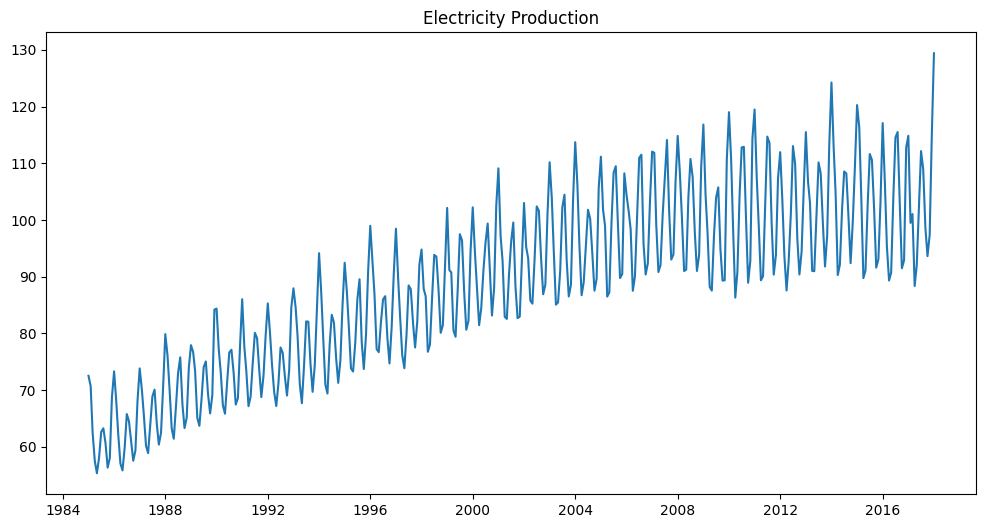

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df['ElectricityProduction'])
plt.title('Electricity Production')
plt.show()

**Decompose the Time Series**

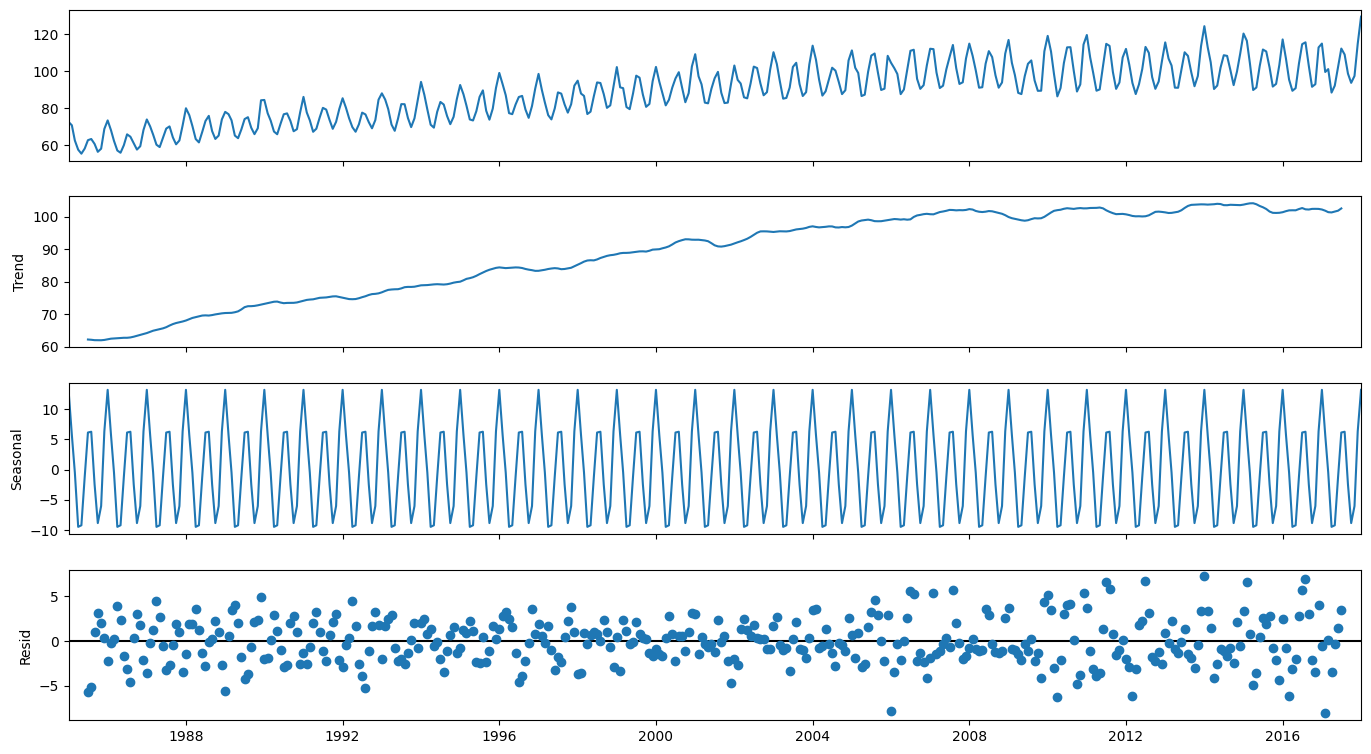

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df)
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

# Moving Averages and Exponential Smoothing

Divide Data into Train and Test

In [15]:
train_len = int(np.ceil(len(df)*0.75))
print(train_len)

298


In [16]:
train=df[0:train_len]
test=df[train_len:]
print('Train Data Length: ', len(train))
print('Test Data Length: ', len(test))

Train Data Length:  298
Test Data Length:  99
